In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import sys

sys.path.insert(0, "C:/workspace/data-science//libs")
from big_numbers import expand_to_18_decimals,\
                        expand_to_18_decimals_object,\
                        contract_18_decimals_to_float

In [3]:
def hued_lineplot(df: pd.DataFrame, column_1: str, column_2: str, hued_column: str,
                  labels: list, xlabel: str, ylabel: str, title: str, 
                  color_set: str='Set1', xsize: int=30, ysize: int=15,
                  is_grid_required: bool=False):
    """Hued lineplot

    Args:
        df (pd.DataFrame): data to plot
        column_1 (str): x axis column
        column_2 (str): y axis column
        hued_column (str): column based on which hue will be performed
        labels (list): categories based on which hue will be done
        xlabel (str): x axis name
        ylabel (str): y axis name
        title (str): name of the chart
        color_set (str, optional): color set chosen for plotting lines. Defaults to 'Set1'.
        xsize (int, optional): x size of chart. Defaults to 30.
        ysize (int, optional): y size of chart. Defaults to 15.
        is_grid_required (bool, optional): is grid of the chart required. Defaults to False
    """
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    rgb_values = sns.color_palette(color_set, len(labels))
    color_map = dict(zip(labels, rgb_values))
    
    for label in labels:
        ax.plot(df[df[hued_column] == label][column_1], df[df[hued_column] == label][column_2],
                color=color_map[label], label=label)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    fig.legend()
    ax.grid(is_grid_required)
    plt.show()

In [4]:
%%time
position_changes_df = pd.read_csv('position_changes_pure_df.csv')
positions_df = pd.read_csv('positions_pure_df.csv')
amm_positions_df = pd.read_csv('amm_positions_pure_df.csv')
liquidations_df = pd.read_csv('liquidation_pure_df.csv')

position_changes_df.drop(columns=['Unnamed: 0'], inplace=True)
positions_df.drop(columns=['Unnamed: 0'], inplace=True)
amm_positions_df.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\Zbook\anaconda3\lib\site-packages\IPython\core\magics\execution.py:1321: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


Wall time: 53.7 s


In [5]:
replacement_map = {'0x0f346e19f01471c02485df1758cfd3d624e399b4': 'BTC/USDC',
                      '0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df': 'ETH/USDC',
                      '0xd41025350582674144102b74b8248550580bb869': 'YFI/USDC',
                      '0x6de775aabeeede8efdb1a257198d56a3ac18c2fd': 'DOT/USDC',
                      '0xb397389b61cbf3920d297b4ea1847996eb2ac8e8': 'SNX/USDC',
                      '0x80daf8abd5a6ba182033b6464e3e39a0155dcc10': 'LINK/USDC',
                      '0x16a7ecf2c27cb367df36d39e389e66b42000e0df': 'AAVE/USDC',
                      '0xf559668108ff57745d5e3077b0a7dd92ffc6300c': 'SUSHI/USDC',
                      '0x33fbaefb2dcc3b7e0b80afbb4377c2eb64af0a3a': 'COMP/USDC',
                      '0x922f28072babe6ea0c0c25ccd367fda0748a5ec7': 'REN/USDC',
                      '0xfcae57db10356fcf76b6476b21ac14c504a45128': 'PERP/USDC',
                      '0xeac6cee594edd353351babc145c624849bb70b11': 'UNI/USDC',
                      '0xab08ff2c726f2f333802630ee19f4146385cc343': 'CRV/USDC',
                      '0xb48f7accc03a3c64114170291f352b37eea26c0b': 'MKR/USDC',
                      '0x7b479a0a816ca33f8eb5a3312d1705a34d2d4c82': 'CREAM/USDC',
                      '0x187c938543f2bde09fe39034fe3ff797a3d35ca0': 'GRT/USDC',
                      '0x26789518695b56e16f14008c35dc1b281bd5fc0e': 'ALPHA/USDC',
                      '0xf9e30f08a738620bc2331f728de4dac7937888d3': 'unknown',
                      '0x838b322610bd99a449091d3bf3fba60d794909a9': 'FTT/USDC'}

position_changes_df['amm_name'] = position_changes_df['amm']
position_changes_df['amm_name'].replace(replacement_map, inplace=True)
position_changes_df

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5552445853546327653508,16657337560638982960524,872709803766812432,16657337560638982960,872709803766812432,0,0,0,0,19120287599999999999991,0,13508290,2020-12-14 03:16:05,BTC/USDC
1,0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,6816007869174706369636,20448023607524119108908,34908392150672497289,20448023607524119108,34908392150672497289,0,0,0,0,586786589999999999999,0,13508290,2020-12-14 03:16:05,ETH/USDC
2,0xeebbca404104c295253184426d13273fcafcb7886773...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,13632015738349412739272,20448023607524119108908,34786744891928598284,20448023607524119108,69695137042601095573,0,71380545219676979734,0,0,588836755278495176178,0,13508290,2020-12-14 03:16:05,ETH/USDC
3,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11114599999999999999999,16686462439361017039473,871186558963631015,16686462439361017039,1743896362730443447,0,58249668560559604311,0,0,19187208606599999999964,0,13508954,2020-12-14 04:11:45,BTC/USDC
4,0xea81e16520eae51395b4627365487daa2013df876ef3...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0,33343799999999999982175,-1743896362730443447,33343799999999999982,0,-17822,0,0,0,19053600000000000000035,0,13509011,2020-12-14 04:16:30,BTC/USDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341964,0xd6b80d8c63a2e68138c6b7f7373dcdc279d7b977b366...,0xce7e86725fa9ef1f5cd0f266bf5d48af1686f445,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,3978375076652345989939,1557933589686227042304,-599936320251328691,1557933589686227042,1500108155578707766,2365633525334180076,5915138031612370507,0,0,2596667440292740247939,0,21102610,2022-03-14 09:46:50,ETH/USDC
9341965,0xfcbb8bd63053c16269c4a1557a6fd42e3ddd92998c6b...,0x9d9250586e0443b49cbc975aa51dfb739c8ec50d,0xab08ff2c726f2f333802630ee19f4146385cc343,25461339594641860147018,2314200313342314635887,1171740512680949426183,2314200313342314635,-11576634819969187905159,-13059771734087299467,-129028745324990831181,0,0,1975699635459709533,1483261420404085207,21102627,2022-03-14 09:48:15,CRV/USDC
9341966,0x3430325ddfd0ae52500a6c7c6c36cfd8193f81a76aa5...,0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d,0x26789518695b56e16f14008c35dc1b281bd5fc0e,18127454018012221695944,613110964906889183232,2350725652446102061730,613110964906889183,-92971274247548527776598,4709797248212118611,186272630818588463601,0,0,260852437408187678,0,21102629,2022-03-14 09:48:25,ALPHA/USDC
9341967,0x26460150a641bcc3ddba218653448d0e0d05968049b8...,0xc701072cd7396622fac184aa778d549a34b1545c,0xd41025350582674144102b74b8248550580bb869,0,4002836311797795150570,215158958514623513,4002836311797795150,0,-2836311797795150570,0,0,0,18621705632694865862438,0,21102631,2022-03-14 09:48:35,YFI/USDC


In [6]:
# transform all numerical data
position_changes_df['margin'] = position_changes_df['margin'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['position_notional'] = position_changes_df['position_notional'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['exchanged_position_size'] = position_changes_df['exchanged_position_size'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['fee'] = position_changes_df['fee'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['position_size_after'] = position_changes_df['position_size_after'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['realized_pnl'] = position_changes_df['realized_pnl'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['unrealized_pnl_after'] = position_changes_df['unrealized_pnl_after'].apply(
                                            lambda x: contract_18_decimals_to_float(x))
position_changes_df['bad_debt'] = position_changes_df['bad_debt'].apply(lambda x: contract_18_decimals_to_float(x))
position_changes_df['liquidation_penalty'] = position_changes_df['liquidation_penalty'].apply(
                                                lambda x: contract_18_decimals_to_float(x))
position_changes_df['spot_price'] = position_changes_df['spot_price'].apply(
                                    lambda x: contract_18_decimals_to_float(x))
position_changes_df['funding_payment'] = position_changes_df['funding_payment'].apply(
                                            lambda x: contract_18_decimals_to_float(x))

# make sure that there is a datetime info
position_changes_df['timestamp'] = pd.to_datetime(position_changes_df['timestamp'])

In [7]:
%%time
cur_opening_index = 0
opening_position_changes_df = position_changes_df[position_changes_df['exchanged_position_size'] == 
                                                  position_changes_df['position_size_after']]
opening_position_changes_df['open_close_id'] = np.arange(len(opening_position_changes_df))

position_changes_df['open_close_id'] = np.zeros(len(position_changes_df))
position_changes_df.loc[opening_position_changes_df.index, "open_close_id"] = opening_position_changes_df['open_close_id']


position_changes_df

Wall time: 1.43 s


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id
0,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5552.445854,16657.337561,0.872710,16.657338,0.872710,0.000000e+00,0.000000e+00,0.0,0.0,19120.287600,0.000000,13508290,2020-12-14 03:16:05,BTC/USDC,0.0
1,0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,6816.007869,20448.023608,34.908392,20.448024,34.908392,0.000000e+00,0.000000e+00,0.0,0.0,586.786590,0.000000,13508290,2020-12-14 03:16:05,ETH/USDC,1.0
2,0xeebbca404104c295253184426d13273fcafcb7886773...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,13632.015738,20448.023608,34.786745,20.448024,69.695137,0.000000e+00,7.138055e+01,0.0,0.0,588.836755,0.000000,13508290,2020-12-14 03:16:05,ETH/USDC,0.0
3,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11114.600000,16686.462439,0.871187,16.686462,1.743896,0.000000e+00,5.824967e+01,0.0,0.0,19187.208607,0.000000,13508954,2020-12-14 04:11:45,BTC/USDC,0.0
4,0xea81e16520eae51395b4627365487daa2013df876ef3...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000,33343.800000,-1.743896,33.343800,0.000000,-1.782200e-14,0.000000e+00,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341964,0xd6b80d8c63a2e68138c6b7f7373dcdc279d7b977b366...,0xce7e86725fa9ef1f5cd0f266bf5d48af1686f445,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,3978.375077,1557.933590,-0.599936,1.557934,1.500108,2.365634e+00,5.915138e+00,0.0,0.0,2596.667440,0.000000,21102610,2022-03-14 09:46:50,ETH/USDC,0.0
9341965,0xfcbb8bd63053c16269c4a1557a6fd42e3ddd92998c6b...,0x9d9250586e0443b49cbc975aa51dfb739c8ec50d,0xab08ff2c726f2f333802630ee19f4146385cc343,25461.339595,2314.200313,1171.740513,2.314200,-11576.634820,-1.305977e+01,-1.290287e+02,0.0,0.0,1.975700,1.483261,21102627,2022-03-14 09:48:15,CRV/USDC,0.0
9341966,0x3430325ddfd0ae52500a6c7c6c36cfd8193f81a76aa5...,0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d,0x26789518695b56e16f14008c35dc1b281bd5fc0e,18127.454018,613.110965,2350.725652,0.613111,-92971.274248,4.709797e+00,1.862726e+02,0.0,0.0,0.260852,0.000000,21102629,2022-03-14 09:48:25,ALPHA/USDC,0.0
9341967,0x26460150a641bcc3ddba218653448d0e0d05968049b8...,0xc701072cd7396622fac184aa778d549a34b1545c,0xd41025350582674144102b74b8248550580bb869,0.000000,4002.836312,0.215159,4.002836,0.000000,-2.836312e+00,0.000000e+00,0.0,0.0,18621.705633,0.000000,21102631,2022-03-14 09:48:35,YFI/USDC,0.0


In [8]:
position_changes_df.open_close_id.max()

1235481.0

In [9]:
%%time
cur_opening_index = 0
closing_position_changes_df = position_changes_df[position_changes_df['position_size_after'] == 
                                                  0]
closing_position_changes_df['close_id'] = np.arange(len(closing_position_changes_df))

# position_changes_df['open_close_id'] = np.zeros(len(position_changes_df))
# position_changes_df.loc[opening_position_changes_df.index, "open_close_id"] = opening_position_changes_df['open_close_id']

# position_changes_df

Wall time: 732 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Openings position sizes

In [10]:
big_pools = ['BTC/USDC', 'YFI/USDC']
medium_pools = ['ETH/USDC', 'MKR/USDC', 'COMP/USDC', 'AAVE/USDC']
small_pools = ['DOT/USDC', 'SNX/USDC', 'LINK/USDC',  'SUSHI/USDC', 
               'REN/USDC', 'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 
               'GRT/USDC', 'ALPHA/USDC', 'unknown', 'FTT/USDC', 'CREAM/USDC']

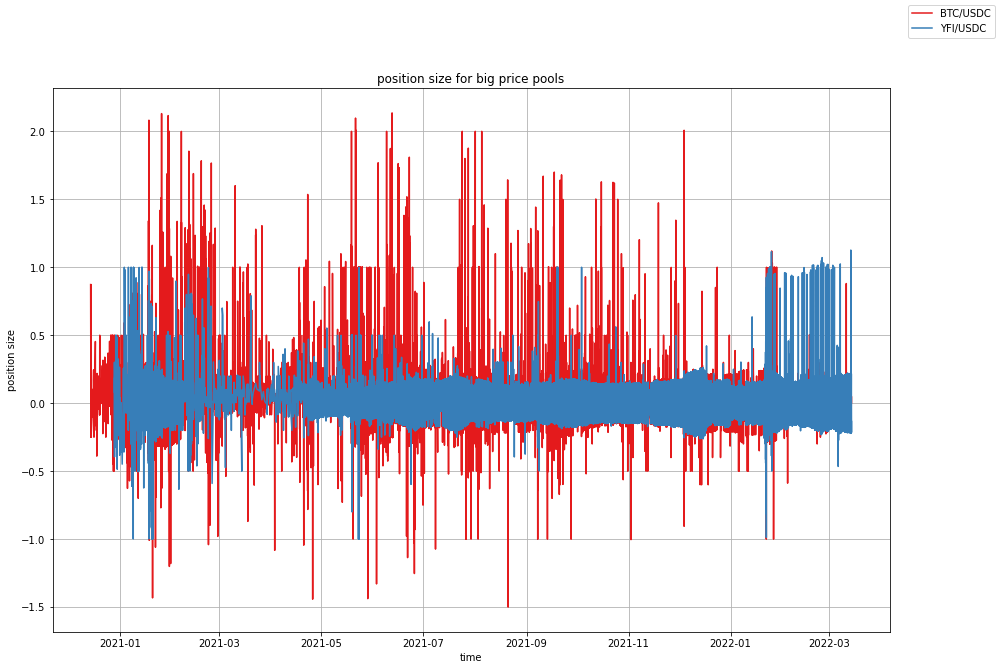

In [11]:
hued_lineplot(opening_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=big_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for big price pools',
              is_grid_required=True)

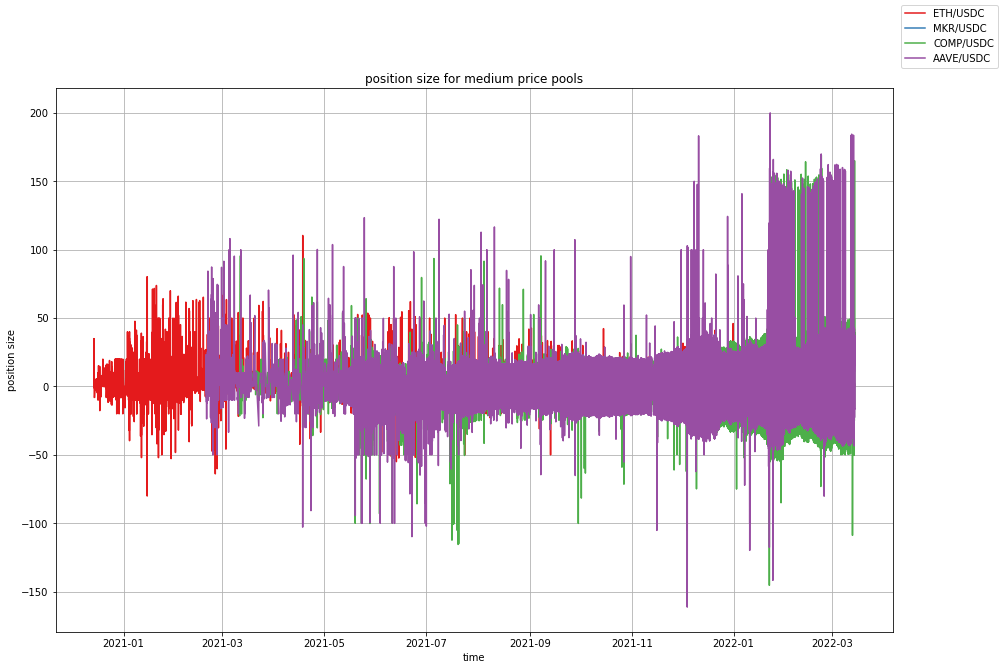

In [12]:
hued_lineplot(opening_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=medium_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for medium price pools',
              is_grid_required=True)

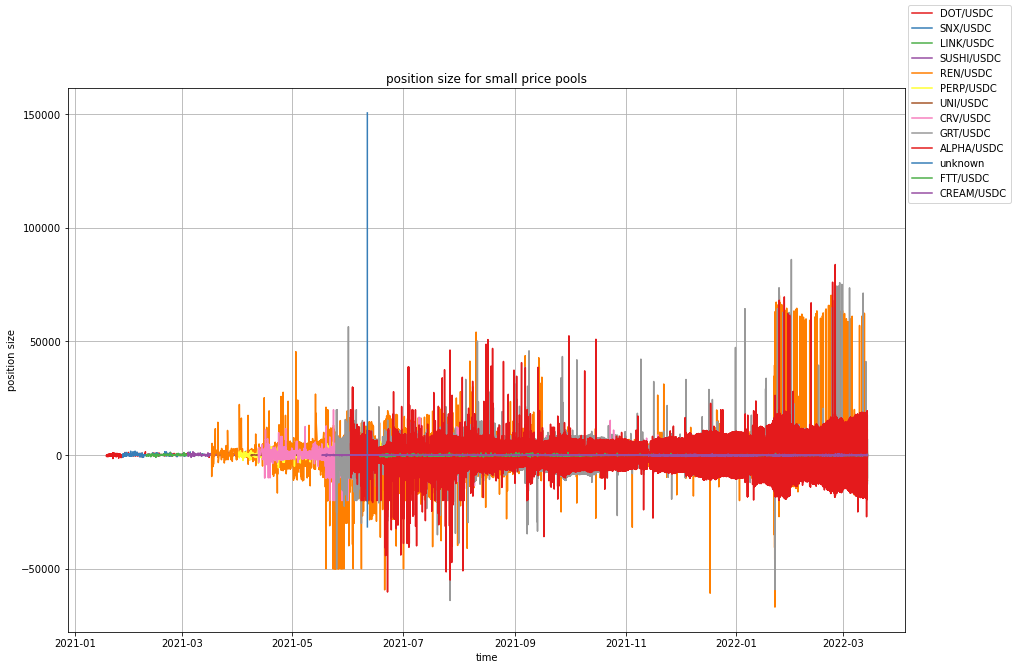

In [13]:
hued_lineplot(opening_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=small_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for small price pools',
              is_grid_required=True)

# Closings position sizes

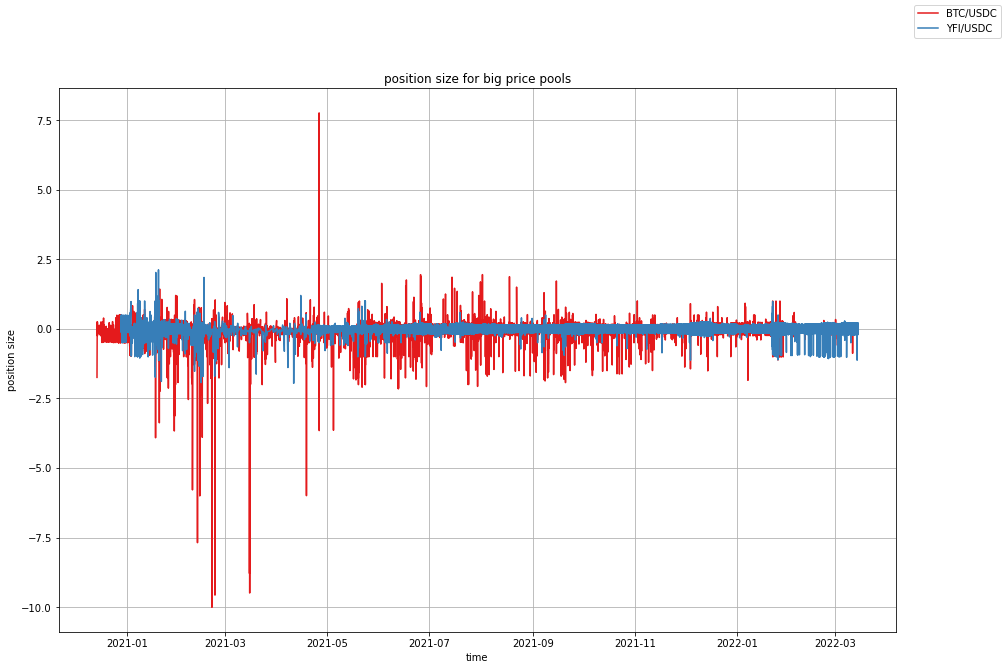

In [14]:
hued_lineplot(closing_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=big_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for big price pools',
              is_grid_required=True)

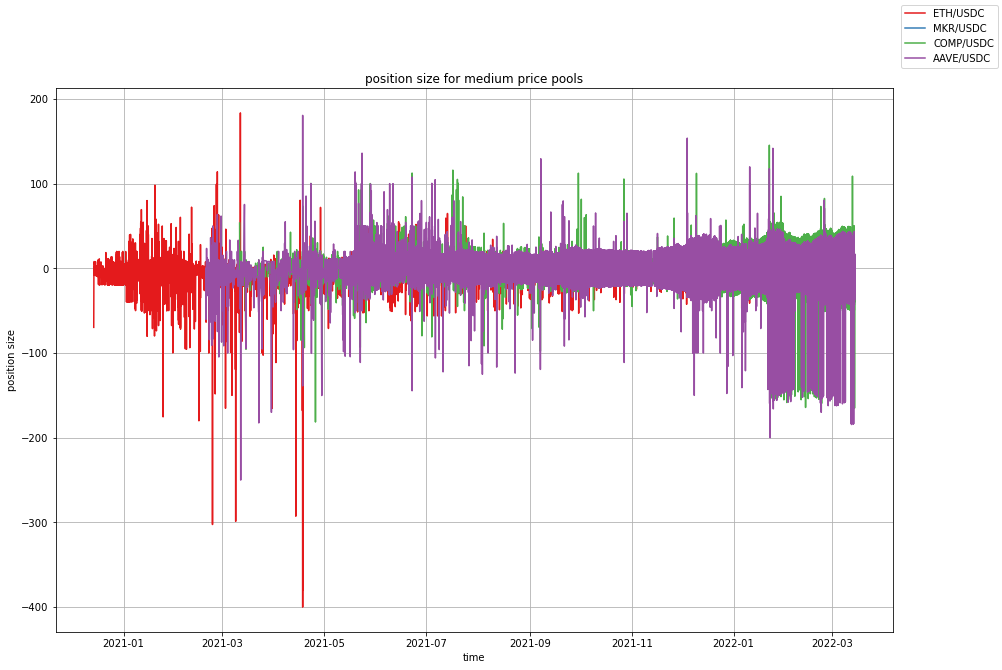

In [15]:
hued_lineplot(closing_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=medium_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for medium price pools',
              is_grid_required=True)

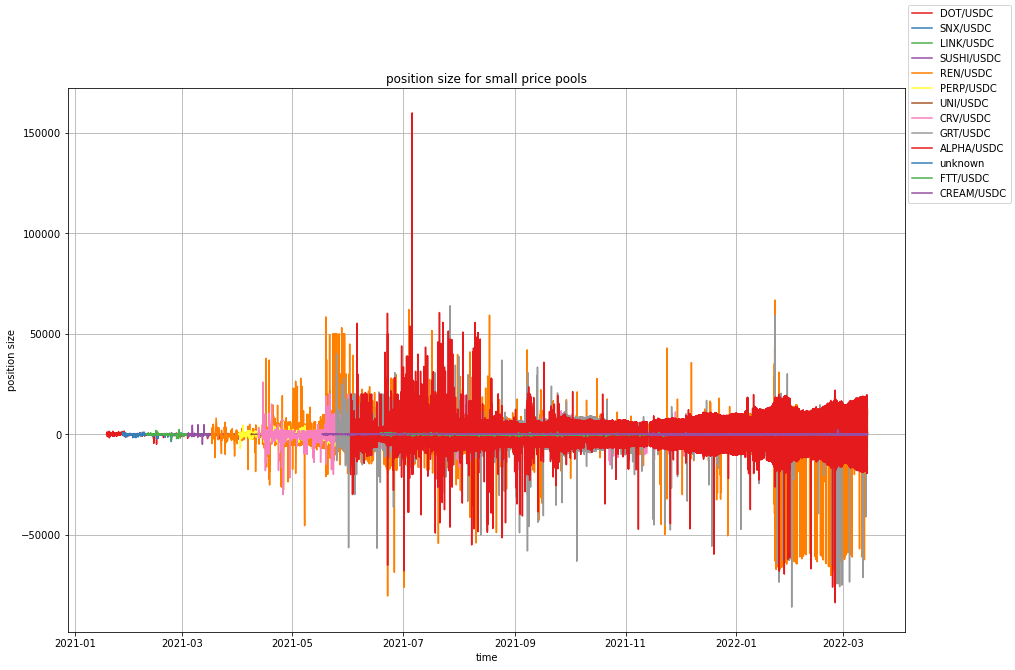

In [16]:
hued_lineplot(closing_position_changes_df, 'timestamp', 'exchanged_position_size', 'amm_name', 
              labels=small_pools, xsize=15, ysize=10,
              xlabel='time', ylabel='position size',
              title='position size for small price pools',
              is_grid_required=True)

## Solutions to find all opens and closes of positions

In [17]:
position_changes_df['amm_name'].unique()

array(['BTC/USDC', 'ETH/USDC', 'YFI/USDC', 'DOT/USDC', 'SNX/USDC',
       'LINK/USDC', 'AAVE/USDC', 'SUSHI/USDC', 'COMP/USDC', 'REN/USDC',
       'PERP/USDC', 'UNI/USDC', 'CRV/USDC', 'MKR/USDC', 'CREAM/USDC',
       'GRT/USDC', 'ALPHA/USDC', 'unknown', 'FTT/USDC'], dtype=object)

In [18]:
len(position_changes_df[position_changes_df['position_size_after'] == 0])

1230583

In [19]:
position_changes_df[position_changes_df['position_size_after'] == 0]

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,open_close_id
4,0xea81e16520eae51395b4627365487daa2013df876ef3...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.0,33343.800000,-1.743896,33.343800,0.0,-1.782200e-14,0.0,0.0,0.0,19053.600000,0.000000,13509011,2020-12-14 04:16:30,BTC/USDC,0.0
5,0xacc1edbc8c6244635a5e6f7a67e99d6f9f567fa47bf2...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.0,40896.047215,-69.695137,40.896047,0.0,-4.520000e-16,0.0,0.0,0.0,584.740000,0.000000,13509018,2020-12-14 04:17:05,ETH/USDC,0.0
14,0x6bb1ea8933e35f4dd5a89ecd80503e2edfaab34ff765...,0x3f84e391ea8dc12946e17d1d85cdf0b35d4fe650,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.0,585.191388,1.000000,0.585191,0.0,-5.853733e-02,0.0,0.0,0.0,585.220660,0.000000,13510820,2020-12-14 06:48:10,ETH/USDC,0.0
17,0x3eacb25a075452d4d0eecdeeaf4c9aca626fd5d7dbdc...,0x9602686bf53a17baed60c48ba34ed4219a532381,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,0.0,3052.503690,-5.215000,3.052504,0.0,2.289247e+00,0.0,0.0,0.0,585.178802,-0.215984,13510977,2020-12-14 07:01:30,ETH/USDC,0.0
21,0x8b45f59f61496a1af80cf76f1c19464d7501516b8eeb...,0x5bea7caa02142ba59885466757e1112819731f09,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.0,1907.704625,-0.100000,1.907705,0.0,1.206095e+00,0.0,0.0,0.0,19073.228880,-0.125905,13511028,2020-12-14 07:05:45,BTC/USDC,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341918,0xa3818e92d9a46e150c9502d868e69b2f65a0e24d0deb...,0x4700381c4ee01d026dc91a6d4549b77036e5ea9b,0x187c938543f2bde09fe39034fe3ff797a3d35ca0,0.0,4509.670374,12768.660040,4.509670,0.0,-9.670374e+00,0.0,0.0,0.0,0.353481,0.000000,21102548,2022-03-14 09:41:40,GRT/USDC,0.0
9341925,0x4a075fc7ea21e1d0971517fcf20b8b4686d0cc32f423...,0xa46261c04043ff0cd57c7f9dda3db9f353d2d6f2,0x187c938543f2bde09fe39034fe3ff797a3d35ca0,0.0,2500.000000,-7069.222561,2.500000,0.0,-1.000000e-18,0.0,0.0,0.0,0.353481,0.000000,21102563,2022-03-14 09:42:55,GRT/USDC,0.0
9341948,0x161ea22008ae0843a9da2ec461aa5d6e07a7f4346f80...,0xb35ba7ddb1f5b09bffb2955fe843b5d15b8d7a25,0x187c938543f2bde09fe39034fe3ff797a3d35ca0,0.0,3500.000000,9908.013334,3.500000,0.0,-1.000000e-18,0.0,0.0,0.0,0.353481,0.000000,21102578,2022-03-14 09:44:10,GRT/USDC,0.0
9341950,0x4f2727e066a35c052efb1f890695703ea04a882acf33...,0x1b11659201f2b339b14acbdf975719b2c677fc2d,0x7b479a0a816ca33f8eb5a3312d1705a34d2d4c82,0.0,2491.368778,58.373783,2.491369,0.0,8.631222e+00,0.0,0.0,0.0,42.703063,-0.095260,21102579,2022-03-14 09:44:15,CREAM/USDC,0.0


In [27]:
for amm in position_changes_df['amm_name'].unique():
    print('amm ' + amm + ' has ' + str(len(
        position_changes_df[(position_changes_df['position_size_after'] == 0) &
                            (position_changes_df['amm_name'] == amm)])) + ' closes')

amm BTC/USDC has 34264 closes
amm ETH/USDC has 44867 closes
amm YFI/USDC has 64003 closes
amm DOT/USDC has 82901 closes
amm SNX/USDC has 94867 closes
amm LINK/USDC has 65534 closes
amm AAVE/USDC has 78000 closes
amm SUSHI/USDC has 94438 closes
amm COMP/USDC has 72679 closes
amm REN/USDC has 89550 closes
amm PERP/USDC has 83685 closes
amm UNI/USDC has 55174 closes
amm CRV/USDC has 93346 closes
amm MKR/USDC has 47335 closes
amm CREAM/USDC has 61456 closes
amm GRT/USDC has 72325 closes
amm ALPHA/USDC has 56656 closes
amm unknown has 1 closes
amm FTT/USDC has 39502 closes


In [21]:
len(position_changes_df[position_changes_df['position_size_after'] == 0]['trader'].unique())

8114

In [48]:
%%time
btc_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'BTC/USDC']
btc_usdc_positions['open_id'] = np.zeros(len(btc_usdc_positions))

total_iterations = len(btc_usdc_positions['trader'].unique())
cur_iteration = 0
total_btc_usdc_opens_closes_list = []

for trader in btc_usdc_positions['trader'].unique():
    trader_btc_usdc_df = btc_usdc_positions[btc_usdc_positions['trader'] == trader]
    trader_opens_df = trader_btc_usdc_df[
            trader_btc_usdc_df['exchanged_position_size'] == trader_btc_usdc_df['position_size_after']
    ]
    
    trader_btc_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_btc_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_btc_usdc_opens_closes_list.append(trader_btc_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_btc_usdc_opens_closes_df = pd.concat(total_btc_usdc_opens_closes_list)
total_btc_usdc_opens_closes_df.to_csv('btc_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Zbook\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


finished 0 iteration out of 5023
finished 1 iteration out of 5023
finished 2 iteration out of 5023
finished 3 iteration out of 5023
finished 4 iteration out of 5023
finished 5 iteration out of 5023
finished 6 iteration out of 5023
finished 7 iteration out of 5023
finished 8 iteration out of 5023
finished 9 iteration out of 5023
finished 10 iteration out of 5023
finished 11 iteration out of 5023
finished 12 iteration out of 5023
finished 13 iteration out of 5023
finished 14 iteration out of 5023
finished 15 iteration out of 5023
finished 16 iteration out of 5023
finished 17 iteration out of 5023
finished 18 iteration out of 5023
finished 19 iteration out of 5023
finished 20 iteration out of 5023
finished 21 iteration out of 5023
finished 22 iteration out of 5023
finished 23 iteration out of 5023
finished 24 iteration out of 5023
finished 25 iteration out of 5023
finished 26 iteration out of 5023
finished 27 iteration out of 5023
finished 28 iteration out of 5023
finished 29 iteration ou

In [49]:
%%time
eth_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'ETH/USDC']
eth_usdc_positions['open_id'] = np.zeros(len(eth_usdc_positions))

total_iterations = len(eth_usdc_positions['trader'].unique())
cur_iteration = 0
total_eth_usdc_opens_closes_list = []

for trader in eth_usdc_positions['trader'].unique():
    trader_eth_usdc_df = eth_usdc_positions[eth_usdc_positions['trader'] == trader]
    trader_opens_df = trader_eth_usdc_df[
            trader_eth_usdc_df['exchanged_position_size'] == trader_eth_usdc_df['position_size_after']
    ]
    
    trader_eth_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_eth_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_eth_usdc_opens_closes_list.append(trader_eth_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_eth_usdc_opens_closes_df = pd.concat(total_eth_usdc_opens_closes_list)
total_eth_usdc_opens_closes_df.to_csv('eth_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 4154
finished 1 iteration out of 4154
finished 2 iteration out of 4154
finished 3 iteration out of 4154
finished 4 iteration out of 4154
finished 5 iteration out of 4154
finished 6 iteration out of 4154
finished 7 iteration out of 4154
finished 8 iteration out of 4154
finished 9 iteration out of 4154
finished 10 iteration out of 4154
finished 11 iteration out of 4154
finished 12 iteration out of 4154
finished 13 iteration out of 4154
finished 14 iteration out of 4154
finished 15 iteration out of 4154
finished 16 iteration out of 4154
finished 17 iteration out of 4154
finished 18 iteration out of 4154
finished 19 iteration out of 4154
finished 20 iteration out of 4154
finished 21 iteration out of 4154
finished 22 iteration out of 4154
finished 23 iteration out of 4154
finished 24 iteration out of 4154
finished 25 iteration out of 4154
finished 26 iteration out of 4154
finished 27 iteration out of 4154
finished 28 iteration out of 4154
finished 29 iteration ou

In [50]:
%%time
yfi_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'YFI/USDC']
yfi_usdc_positions['open_id'] = np.zeros(len(yfi_usdc_positions))

total_iterations = len(yfi_usdc_positions['trader'].unique())
cur_iteration = 0
total_yfi_usdc_opens_closes_list = []

for trader in yfi_usdc_positions['trader'].unique():
    trader_yfi_usdc_df = yfi_usdc_positions[yfi_usdc_positions['trader'] == trader]
    trader_opens_df = trader_yfi_usdc_df[
            trader_yfi_usdc_df['exchanged_position_size'] == trader_yfi_usdc_df['position_size_after']
    ]
    
    trader_yfi_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_yfi_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_yfi_usdc_opens_closes_list.append(trader_yfi_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_yfi_usdc_opens_closes_df = pd.concat(total_yfi_usdc_opens_closes_list)
total_yfi_usdc_opens_closes_df.to_csv('yfi_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 531
finished 1 iteration out of 531
finished 2 iteration out of 531
finished 3 iteration out of 531
finished 4 iteration out of 531
finished 5 iteration out of 531
finished 6 iteration out of 531
finished 7 iteration out of 531
finished 8 iteration out of 531
finished 9 iteration out of 531
finished 10 iteration out of 531
finished 11 iteration out of 531
finished 12 iteration out of 531
finished 13 iteration out of 531
finished 14 iteration out of 531
finished 15 iteration out of 531
finished 16 iteration out of 531
finished 17 iteration out of 531
finished 18 iteration out of 531
finished 19 iteration out of 531
finished 20 iteration out of 531
finished 21 iteration out of 531
finished 22 iteration out of 531
finished 23 iteration out of 531
finished 24 iteration out of 531
finished 25 iteration out of 531
finished 26 iteration out of 531
finished 27 iteration out of 531
finished 28 iteration out of 531
finished 29 iteration out of 531
finished 30 iteratio

In [51]:
%%time
dot_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'DOT/USDC']
dot_usdc_positions['open_id'] = np.zeros(len(dot_usdc_positions))

total_iterations = len(dot_usdc_positions['trader'].unique())
cur_iteration = 0
total_dot_usdc_opens_closes_list = []

for trader in dot_usdc_positions['trader'].unique():
    trader_dot_usdc_df = dot_usdc_positions[dot_usdc_positions['trader'] == trader]
    trader_opens_df = trader_dot_usdc_df[
            trader_dot_usdc_df['exchanged_position_size'] == trader_dot_usdc_df['position_size_after']
    ]
    
    trader_dot_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_dot_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_dot_usdc_opens_closes_list.append(trader_dot_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_dot_usdc_opens_closes_df = pd.concat(total_dot_usdc_opens_closes_list)
total_dot_usdc_opens_closes_df.to_csv('dot_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 769
finished 1 iteration out of 769
finished 2 iteration out of 769
finished 3 iteration out of 769
finished 4 iteration out of 769
finished 5 iteration out of 769
finished 6 iteration out of 769
finished 7 iteration out of 769
finished 8 iteration out of 769
finished 9 iteration out of 769
finished 10 iteration out of 769
finished 11 iteration out of 769
finished 12 iteration out of 769
finished 13 iteration out of 769
finished 14 iteration out of 769
finished 15 iteration out of 769
finished 16 iteration out of 769
finished 17 iteration out of 769
finished 18 iteration out of 769
finished 19 iteration out of 769
finished 20 iteration out of 769
finished 21 iteration out of 769
finished 22 iteration out of 769
finished 23 iteration out of 769
finished 24 iteration out of 769
finished 25 iteration out of 769
finished 26 iteration out of 769
finished 27 iteration out of 769
finished 28 iteration out of 769
finished 29 iteration out of 769
finished 30 iteratio

In [52]:
%%time
snx_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'SNX/USDC']
snx_usdc_positions['open_id'] = np.zeros(len(snx_usdc_positions))

total_iterations = len(snx_usdc_positions['trader'].unique())
cur_iteration = 0
total_snx_usdc_opens_closes_list = []

for trader in snx_usdc_positions['trader'].unique():
    trader_snx_usdc_df = snx_usdc_positions[snx_usdc_positions['trader'] == trader]
    trader_opens_df = trader_snx_usdc_df[
            trader_snx_usdc_df['exchanged_position_size'] == trader_snx_usdc_df['position_size_after']
    ]
    
    trader_snx_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_snx_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_snx_usdc_opens_closes_list.append(trader_snx_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_snx_usdc_opens_closes_df = pd.concat(total_snx_usdc_opens_closes_list)
total_snx_usdc_opens_closes_df.to_csv('snx_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 531
finished 1 iteration out of 531
finished 2 iteration out of 531
finished 3 iteration out of 531
finished 4 iteration out of 531
finished 5 iteration out of 531
finished 6 iteration out of 531
finished 7 iteration out of 531
finished 8 iteration out of 531
finished 9 iteration out of 531
finished 10 iteration out of 531
finished 11 iteration out of 531
finished 12 iteration out of 531
finished 13 iteration out of 531
finished 14 iteration out of 531
finished 15 iteration out of 531
finished 16 iteration out of 531
finished 17 iteration out of 531
finished 18 iteration out of 531
finished 19 iteration out of 531
finished 20 iteration out of 531
finished 21 iteration out of 531
finished 22 iteration out of 531
finished 23 iteration out of 531
finished 24 iteration out of 531
finished 25 iteration out of 531
finished 26 iteration out of 531
finished 27 iteration out of 531
finished 28 iteration out of 531
finished 29 iteration out of 531
finished 30 iteratio

In [53]:
%%time
link_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'LINK/USDC']
link_usdc_positions['open_id'] = np.zeros(len(link_usdc_positions))

total_iterations = len(link_usdc_positions['trader'].unique())
cur_iteration = 0
total_link_usdc_opens_closes_list = []

for trader in link_usdc_positions['trader'].unique():
    trader_link_usdc_df = link_usdc_positions[link_usdc_positions['trader'] == trader]
    trader_opens_df = trader_link_usdc_df[
            trader_link_usdc_df['exchanged_position_size'] == trader_link_usdc_df['position_size_after']
    ]
    
    trader_link_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_link_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_link_usdc_opens_closes_list.append(trader_link_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_link_usdc_opens_closes_df = pd.concat(total_link_usdc_opens_closes_list)
total_link_usdc_opens_closes_df.to_csv('link_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 842
finished 1 iteration out of 842
finished 2 iteration out of 842
finished 3 iteration out of 842
finished 4 iteration out of 842
finished 5 iteration out of 842
finished 6 iteration out of 842
finished 7 iteration out of 842
finished 8 iteration out of 842
finished 9 iteration out of 842
finished 10 iteration out of 842
finished 11 iteration out of 842
finished 12 iteration out of 842
finished 13 iteration out of 842
finished 14 iteration out of 842
finished 15 iteration out of 842
finished 16 iteration out of 842
finished 17 iteration out of 842
finished 18 iteration out of 842
finished 19 iteration out of 842
finished 20 iteration out of 842
finished 21 iteration out of 842
finished 22 iteration out of 842
finished 23 iteration out of 842
finished 24 iteration out of 842
finished 25 iteration out of 842
finished 26 iteration out of 842
finished 27 iteration out of 842
finished 28 iteration out of 842
finished 29 iteration out of 842
finished 30 iteratio

In [54]:
%%time
aave_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'AAVE/USDC']
aave_usdc_positions['open_id'] = np.zeros(len(aave_usdc_positions))

total_iterations = len(aave_usdc_positions['trader'].unique())
cur_iteration = 0
total_aave_usdc_opens_closes_list = []

for trader in aave_usdc_positions['trader'].unique():
    trader_aave_usdc_df = aave_usdc_positions[aave_usdc_positions['trader'] == trader]
    trader_opens_df = trader_aave_usdc_df[
            trader_aave_usdc_df['exchanged_position_size'] == trader_aave_usdc_df['position_size_after']
    ]
    
    trader_aave_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_aave_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_aave_usdc_opens_closes_list.append(trader_aave_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_aave_usdc_opens_closes_df = pd.concat(total_aave_usdc_opens_closes_list)
total_aave_usdc_opens_closes_df.to_csv('aave_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 560
finished 1 iteration out of 560
finished 2 iteration out of 560
finished 3 iteration out of 560
finished 4 iteration out of 560
finished 5 iteration out of 560
finished 6 iteration out of 560
finished 7 iteration out of 560
finished 8 iteration out of 560
finished 9 iteration out of 560
finished 10 iteration out of 560
finished 11 iteration out of 560
finished 12 iteration out of 560
finished 13 iteration out of 560
finished 14 iteration out of 560
finished 15 iteration out of 560
finished 16 iteration out of 560
finished 17 iteration out of 560
finished 18 iteration out of 560
finished 19 iteration out of 560
finished 20 iteration out of 560
finished 21 iteration out of 560
finished 22 iteration out of 560
finished 23 iteration out of 560
finished 24 iteration out of 560
finished 25 iteration out of 560
finished 26 iteration out of 560
finished 27 iteration out of 560
finished 28 iteration out of 560
finished 29 iteration out of 560
finished 30 iteratio

In [55]:
%%time
sushi_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'SUSHI/USDC']
sushi_usdc_positions['open_id'] = np.zeros(len(sushi_usdc_positions))

total_iterations = len(sushi_usdc_positions['trader'].unique())
cur_iteration = 0
total_sushi_usdc_opens_closes_list = []

for trader in sushi_usdc_positions['trader'].unique():
    trader_sushi_usdc_df = sushi_usdc_positions[sushi_usdc_positions['trader'] == trader]
    trader_opens_df = trader_sushi_usdc_df[
            trader_sushi_usdc_df['exchanged_position_size'] == trader_sushi_usdc_df['position_size_after']
    ]
    
    trader_sushi_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_sushi_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_sushi_usdc_opens_closes_list.append(trader_sushi_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_sushi_usdc_opens_closes_df = pd.concat(total_sushi_usdc_opens_closes_list)
total_sushi_usdc_opens_closes_df.to_csv('sushi_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 703
finished 1 iteration out of 703
finished 2 iteration out of 703
finished 3 iteration out of 703
finished 4 iteration out of 703
finished 5 iteration out of 703
finished 6 iteration out of 703
finished 7 iteration out of 703
finished 8 iteration out of 703
finished 9 iteration out of 703
finished 10 iteration out of 703
finished 11 iteration out of 703
finished 12 iteration out of 703
finished 13 iteration out of 703
finished 14 iteration out of 703
finished 15 iteration out of 703
finished 16 iteration out of 703
finished 17 iteration out of 703
finished 18 iteration out of 703
finished 19 iteration out of 703
finished 20 iteration out of 703
finished 21 iteration out of 703
finished 22 iteration out of 703
finished 23 iteration out of 703
finished 24 iteration out of 703
finished 25 iteration out of 703
finished 26 iteration out of 703
finished 27 iteration out of 703
finished 28 iteration out of 703
finished 29 iteration out of 703
finished 30 iteratio

In [56]:
%%time
comp_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'COMP/USDC']
comp_usdc_positions['open_id'] = np.zeros(len(comp_usdc_positions))

total_iterations = len(comp_usdc_positions['trader'].unique())
cur_iteration = 0
total_comp_usdc_opens_closes_list = []

for trader in comp_usdc_positions['trader'].unique():
    trader_comp_usdc_df = comp_usdc_positions[comp_usdc_positions['trader'] == trader]
    trader_opens_df = trader_comp_usdc_df[
            trader_comp_usdc_df['exchanged_position_size'] == trader_comp_usdc_df['position_size_after']
    ]
    
    trader_comp_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_comp_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_comp_usdc_opens_closes_list.append(trader_comp_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_comp_usdc_opens_closes_df = pd.concat(total_comp_usdc_opens_closes_list)
total_comp_usdc_opens_closes_df.to_csv('comp_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 398
finished 1 iteration out of 398
finished 2 iteration out of 398
finished 3 iteration out of 398
finished 4 iteration out of 398
finished 5 iteration out of 398
finished 6 iteration out of 398
finished 7 iteration out of 398
finished 8 iteration out of 398
finished 9 iteration out of 398
finished 10 iteration out of 398
finished 11 iteration out of 398
finished 12 iteration out of 398
finished 13 iteration out of 398
finished 14 iteration out of 398
finished 15 iteration out of 398
finished 16 iteration out of 398
finished 17 iteration out of 398
finished 18 iteration out of 398
finished 19 iteration out of 398
finished 20 iteration out of 398
finished 21 iteration out of 398
finished 22 iteration out of 398
finished 23 iteration out of 398
finished 24 iteration out of 398
finished 25 iteration out of 398
finished 26 iteration out of 398
finished 27 iteration out of 398
finished 28 iteration out of 398
finished 29 iteration out of 398
finished 30 iteratio

In [57]:
%%time
ren_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'REN/USDC']
ren_usdc_positions['open_id'] = np.zeros(len(ren_usdc_positions))

total_iterations = len(ren_usdc_positions['trader'].unique())
cur_iteration = 0
total_ren_usdc_opens_closes_list = []

for trader in ren_usdc_positions['trader'].unique():
    trader_ren_usdc_df = ren_usdc_positions[ren_usdc_positions['trader'] == trader]
    trader_opens_df = trader_ren_usdc_df[
            trader_ren_usdc_df['exchanged_position_size'] == trader_ren_usdc_df['position_size_after']
    ]
    
    trader_ren_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_ren_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_ren_usdc_opens_closes_list.append(trader_ren_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_ren_usdc_opens_closes_df = pd.concat(total_ren_usdc_opens_closes_list)
total_ren_usdc_opens_closes_df.to_csv('ren_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 396
finished 1 iteration out of 396
finished 2 iteration out of 396
finished 3 iteration out of 396
finished 4 iteration out of 396
finished 5 iteration out of 396
finished 6 iteration out of 396
finished 7 iteration out of 396
finished 8 iteration out of 396
finished 9 iteration out of 396
finished 10 iteration out of 396
finished 11 iteration out of 396
finished 12 iteration out of 396
finished 13 iteration out of 396
finished 14 iteration out of 396
finished 15 iteration out of 396
finished 16 iteration out of 396
finished 17 iteration out of 396
finished 18 iteration out of 396
finished 19 iteration out of 396
finished 20 iteration out of 396
finished 21 iteration out of 396
finished 22 iteration out of 396
finished 23 iteration out of 396
finished 24 iteration out of 396
finished 25 iteration out of 396
finished 26 iteration out of 396
finished 27 iteration out of 396
finished 28 iteration out of 396
finished 29 iteration out of 396
finished 30 iteratio

In [58]:
%%time
perp_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'PERP/USDC']
perp_usdc_positions['open_id'] = np.zeros(len(perp_usdc_positions))

total_iterations = len(perp_usdc_positions['trader'].unique())
cur_iteration = 0
total_perp_usdc_opens_closes_list = []

for trader in perp_usdc_positions['trader'].unique():
    trader_perp_usdc_df = perp_usdc_positions[perp_usdc_positions['trader'] == trader]
    trader_opens_df = trader_perp_usdc_df[
            trader_perp_usdc_df['exchanged_position_size'] == trader_perp_usdc_df['position_size_after']
    ]
    
    trader_perp_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_perp_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_perp_usdc_opens_closes_list.append(trader_perp_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_perp_usdc_opens_closes_df = pd.concat(total_perp_usdc_opens_closes_list)
total_perp_usdc_opens_closes_df.to_csv('perp_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 959
finished 1 iteration out of 959
finished 2 iteration out of 959
finished 3 iteration out of 959
finished 4 iteration out of 959
finished 5 iteration out of 959
finished 6 iteration out of 959
finished 7 iteration out of 959
finished 8 iteration out of 959
finished 9 iteration out of 959
finished 10 iteration out of 959
finished 11 iteration out of 959
finished 12 iteration out of 959
finished 13 iteration out of 959
finished 14 iteration out of 959
finished 15 iteration out of 959
finished 16 iteration out of 959
finished 17 iteration out of 959
finished 18 iteration out of 959
finished 19 iteration out of 959
finished 20 iteration out of 959
finished 21 iteration out of 959
finished 22 iteration out of 959
finished 23 iteration out of 959
finished 24 iteration out of 959
finished 25 iteration out of 959
finished 26 iteration out of 959
finished 27 iteration out of 959
finished 28 iteration out of 959
finished 29 iteration out of 959
finished 30 iteratio

In [59]:
%%time
uni_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'UNI/USDC']
uni_usdc_positions['open_id'] = np.zeros(len(uni_usdc_positions))

total_iterations = len(uni_usdc_positions['trader'].unique())
cur_iteration = 0
total_uni_usdc_opens_closes_list = []

for trader in uni_usdc_positions['trader'].unique():
    trader_uni_usdc_df = uni_usdc_positions[uni_usdc_positions['trader'] == trader]
    trader_opens_df = trader_uni_usdc_df[
            trader_uni_usdc_df['exchanged_position_size'] == trader_uni_usdc_df['position_size_after']
    ]
    
    trader_uni_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_uni_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_uni_usdc_opens_closes_list.append(trader_uni_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_uni_usdc_opens_closes_df = pd.concat(total_uni_usdc_opens_closes_list)
total_uni_usdc_opens_closes_df.to_csv('uni_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 491
finished 1 iteration out of 491
finished 2 iteration out of 491
finished 3 iteration out of 491
finished 4 iteration out of 491
finished 5 iteration out of 491
finished 6 iteration out of 491
finished 7 iteration out of 491
finished 8 iteration out of 491
finished 9 iteration out of 491
finished 10 iteration out of 491
finished 11 iteration out of 491
finished 12 iteration out of 491
finished 13 iteration out of 491
finished 14 iteration out of 491
finished 15 iteration out of 491
finished 16 iteration out of 491
finished 17 iteration out of 491
finished 18 iteration out of 491
finished 19 iteration out of 491
finished 20 iteration out of 491
finished 21 iteration out of 491
finished 22 iteration out of 491
finished 23 iteration out of 491
finished 24 iteration out of 491
finished 25 iteration out of 491
finished 26 iteration out of 491
finished 27 iteration out of 491
finished 28 iteration out of 491
finished 29 iteration out of 491
finished 30 iteratio

In [60]:
%%time
crv_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'CRV/USDC']
crv_usdc_positions['open_id'] = np.zeros(len(crv_usdc_positions))

total_iterations = len(crv_usdc_positions['trader'].unique())
cur_iteration = 0
total_crv_usdc_opens_closes_list = []

for trader in crv_usdc_positions['trader'].unique():
    trader_crv_usdc_df = crv_usdc_positions[crv_usdc_positions['trader'] == trader]
    trader_opens_df = trader_crv_usdc_df[
            trader_crv_usdc_df['exchanged_position_size'] == trader_crv_usdc_df['position_size_after']
    ]
    
    trader_crv_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_crv_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_crv_usdc_opens_closes_list.append(trader_crv_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_crv_usdc_opens_closes_df = pd.concat(total_crv_usdc_opens_closes_list)
total_crv_usdc_opens_closes_df.to_csv('crv_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 717
finished 1 iteration out of 717
finished 2 iteration out of 717
finished 3 iteration out of 717
finished 4 iteration out of 717
finished 5 iteration out of 717
finished 6 iteration out of 717
finished 7 iteration out of 717
finished 8 iteration out of 717
finished 9 iteration out of 717
finished 10 iteration out of 717
finished 11 iteration out of 717
finished 12 iteration out of 717
finished 13 iteration out of 717
finished 14 iteration out of 717
finished 15 iteration out of 717
finished 16 iteration out of 717
finished 17 iteration out of 717
finished 18 iteration out of 717
finished 19 iteration out of 717
finished 20 iteration out of 717
finished 21 iteration out of 717
finished 22 iteration out of 717
finished 23 iteration out of 717
finished 24 iteration out of 717
finished 25 iteration out of 717
finished 26 iteration out of 717
finished 27 iteration out of 717
finished 28 iteration out of 717
finished 29 iteration out of 717
finished 30 iteratio

In [61]:
%%time
mkr_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'MKR/USDC']
mkr_usdc_positions['open_id'] = np.zeros(len(mkr_usdc_positions))

total_iterations = len(mkr_usdc_positions['trader'].unique())
cur_iteration = 0
total_mkr_usdc_opens_closes_list = []

for trader in mkr_usdc_positions['trader'].unique():
    trader_mkr_usdc_df = mkr_usdc_positions[mkr_usdc_positions['trader'] == trader]
    trader_opens_df = trader_mkr_usdc_df[
            trader_mkr_usdc_df['exchanged_position_size'] == trader_mkr_usdc_df['position_size_after']
    ]
    
    trader_mkr_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_mkr_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_mkr_usdc_opens_closes_list.append(trader_mkr_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_mkr_usdc_opens_closes_df = pd.concat(total_mkr_usdc_opens_closes_list)
total_mkr_usdc_opens_closes_df.to_csv('mkr_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 327
finished 1 iteration out of 327
finished 2 iteration out of 327
finished 3 iteration out of 327
finished 4 iteration out of 327
finished 5 iteration out of 327
finished 6 iteration out of 327
finished 7 iteration out of 327
finished 8 iteration out of 327
finished 9 iteration out of 327
finished 10 iteration out of 327
finished 11 iteration out of 327
finished 12 iteration out of 327
finished 13 iteration out of 327
finished 14 iteration out of 327
finished 15 iteration out of 327
finished 16 iteration out of 327
finished 17 iteration out of 327
finished 18 iteration out of 327
finished 19 iteration out of 327
finished 20 iteration out of 327
finished 21 iteration out of 327
finished 22 iteration out of 327
finished 23 iteration out of 327
finished 24 iteration out of 327
finished 25 iteration out of 327
finished 26 iteration out of 327
finished 27 iteration out of 327
finished 28 iteration out of 327
finished 29 iteration out of 327
finished 30 iteratio

In [62]:
%%time
cream_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'CREAM/USDC']
cream_usdc_positions['open_id'] = np.zeros(len(cream_usdc_positions))

total_iterations = len(cream_usdc_positions['trader'].unique())
cur_iteration = 0
total_cream_usdc_opens_closes_list = []

for trader in cream_usdc_positions['trader'].unique():
    trader_cream_usdc_df = cream_usdc_positions[cream_usdc_positions['trader'] == trader]
    trader_opens_df = trader_cream_usdc_df[
            trader_cream_usdc_df['exchanged_position_size'] == trader_cream_usdc_df['position_size_after']
    ]
    
    trader_cream_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_cream_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_cream_usdc_opens_closes_list.append(trader_cream_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_cream_usdc_opens_closes_df = pd.concat(total_cream_usdc_opens_closes_list)
total_cream_usdc_opens_closes_df.to_csv('cream_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 347
finished 1 iteration out of 347
finished 2 iteration out of 347
finished 3 iteration out of 347
finished 4 iteration out of 347
finished 5 iteration out of 347
finished 6 iteration out of 347
finished 7 iteration out of 347
finished 8 iteration out of 347
finished 9 iteration out of 347
finished 10 iteration out of 347
finished 11 iteration out of 347
finished 12 iteration out of 347
finished 13 iteration out of 347
finished 14 iteration out of 347
finished 15 iteration out of 347
finished 16 iteration out of 347
finished 17 iteration out of 347
finished 18 iteration out of 347
finished 19 iteration out of 347
finished 20 iteration out of 347
finished 21 iteration out of 347
finished 22 iteration out of 347
finished 23 iteration out of 347
finished 24 iteration out of 347
finished 25 iteration out of 347
finished 26 iteration out of 347
finished 27 iteration out of 347
finished 28 iteration out of 347
finished 29 iteration out of 347
finished 30 iteratio

In [63]:
%%time
grt_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'GRT/USDC']
grt_usdc_positions['open_id'] = np.zeros(len(grt_usdc_positions))

total_iterations = len(grt_usdc_positions['trader'].unique())
cur_iteration = 0
total_grt_usdc_opens_closes_list = []

for trader in grt_usdc_positions['trader'].unique():
    trader_grt_usdc_df = grt_usdc_positions[grt_usdc_positions['trader'] == trader]
    trader_opens_df = trader_grt_usdc_df[
            trader_grt_usdc_df['exchanged_position_size'] == trader_grt_usdc_df['position_size_after']
    ]
    
    trader_grt_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_grt_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_grt_usdc_opens_closes_list.append(trader_grt_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_grt_usdc_opens_closes_df = pd.concat(total_grt_usdc_opens_closes_list)
total_grt_usdc_opens_closes_df.to_csv('grt_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 359
finished 1 iteration out of 359
finished 2 iteration out of 359
finished 3 iteration out of 359
finished 4 iteration out of 359
finished 5 iteration out of 359
finished 6 iteration out of 359
finished 7 iteration out of 359
finished 8 iteration out of 359
finished 9 iteration out of 359
finished 10 iteration out of 359
finished 11 iteration out of 359
finished 12 iteration out of 359
finished 13 iteration out of 359
finished 14 iteration out of 359
finished 15 iteration out of 359
finished 16 iteration out of 359
finished 17 iteration out of 359
finished 18 iteration out of 359
finished 19 iteration out of 359
finished 20 iteration out of 359
finished 21 iteration out of 359
finished 22 iteration out of 359
finished 23 iteration out of 359
finished 24 iteration out of 359
finished 25 iteration out of 359
finished 26 iteration out of 359
finished 27 iteration out of 359
finished 28 iteration out of 359
finished 29 iteration out of 359
finished 30 iteratio

In [64]:
%%time
alpha_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'ALPHA/USDC']
alpha_usdc_positions['open_id'] = np.zeros(len(alpha_usdc_positions))

total_iterations = len(alpha_usdc_positions['trader'].unique())
cur_iteration = 0
total_alpha_usdc_opens_closes_list = []

for trader in alpha_usdc_positions['trader'].unique():
    trader_alpha_usdc_df = alpha_usdc_positions[alpha_usdc_positions['trader'] == trader]
    trader_opens_df = trader_alpha_usdc_df[
            trader_alpha_usdc_df['exchanged_position_size'] == trader_alpha_usdc_df['position_size_after']
    ]
    
    trader_alpha_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_alpha_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_alpha_usdc_opens_closes_list.append(trader_alpha_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_alpha_usdc_opens_closes_df = pd.concat(total_alpha_usdc_opens_closes_list)
total_alpha_usdc_opens_closes_df.to_csv('alpha_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 572
finished 1 iteration out of 572
finished 2 iteration out of 572
finished 3 iteration out of 572
finished 4 iteration out of 572
finished 5 iteration out of 572
finished 6 iteration out of 572
finished 7 iteration out of 572
finished 8 iteration out of 572
finished 9 iteration out of 572
finished 10 iteration out of 572
finished 11 iteration out of 572
finished 12 iteration out of 572
finished 13 iteration out of 572
finished 14 iteration out of 572
finished 15 iteration out of 572
finished 16 iteration out of 572
finished 17 iteration out of 572
finished 18 iteration out of 572
finished 19 iteration out of 572
finished 20 iteration out of 572
finished 21 iteration out of 572
finished 22 iteration out of 572
finished 23 iteration out of 572
finished 24 iteration out of 572
finished 25 iteration out of 572
finished 26 iteration out of 572
finished 27 iteration out of 572
finished 28 iteration out of 572
finished 29 iteration out of 572
finished 30 iteratio

In [65]:
%%time
ftt_usdc_positions = position_changes_df[position_changes_df['amm_name'] == 'FTT/USDC']
ftt_usdc_positions['open_id'] = np.zeros(len(ftt_usdc_positions))

total_iterations = len(ftt_usdc_positions['trader'].unique())
cur_iteration = 0
total_ftt_usdc_opens_closes_list = []

for trader in ftt_usdc_positions['trader'].unique():
    trader_ftt_usdc_df = ftt_usdc_positions[ftt_usdc_positions['trader'] == trader]
    trader_opens_df = trader_ftt_usdc_df[
            trader_ftt_usdc_df['exchanged_position_size'] == trader_ftt_usdc_df['position_size_after']
    ]
    
    trader_ftt_usdc_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_ftt_usdc_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_ftt_usdc_opens_closes_list.append(trader_ftt_usdc_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_ftt_usdc_opens_closes_df = pd.concat(total_ftt_usdc_opens_closes_list)
total_ftt_usdc_opens_closes_df.to_csv('ftt_usdc_indexed_position.csv')

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finished 0 iteration out of 566
finished 1 iteration out of 566
finished 2 iteration out of 566
finished 3 iteration out of 566
finished 4 iteration out of 566
finished 5 iteration out of 566
finished 6 iteration out of 566
finished 7 iteration out of 566
finished 8 iteration out of 566
finished 9 iteration out of 566
finished 10 iteration out of 566
finished 11 iteration out of 566
finished 12 iteration out of 566
finished 13 iteration out of 566
finished 14 iteration out of 566
finished 15 iteration out of 566
finished 16 iteration out of 566
finished 17 iteration out of 566
finished 18 iteration out of 566
finished 19 iteration out of 566
finished 20 iteration out of 566
finished 21 iteration out of 566
finished 22 iteration out of 566
finished 23 iteration out of 566
finished 24 iteration out of 566
finished 25 iteration out of 566
finished 26 iteration out of 566
finished 27 iteration out of 566
finished 28 iteration out of 566
finished 29 iteration out of 566
finished 30 iteratio

In [66]:
%%time
unknown_positions = position_changes_df[position_changes_df['amm_name'] == 'unknown']
unknown_positions['open_id'] = np.zeros(len(unknown_positions))

total_iterations = len(unknown_positions['trader'].unique())
cur_iteration = 0
total_unknown_opens_closes_list = []

for trader in unknown_positions['trader'].unique():
    trader_unknown_df = unknown_positions[unknown_positions['trader'] == trader]
    trader_opens_df = trader_unknown_df[
            trader_unknown_df['exchanged_position_size'] == trader_unknown_df['position_size_after']
    ]
    
    trader_unknown_df.loc[trader_opens_df.index, 'open_id'] = np.arange(1, len(trader_opens_df) + 1)
    trader_unknown_df['open_id'].replace(to_replace=0, method='ffill', inplace=True)
    total_unknown_opens_closes_list.append(trader_unknown_df)
    
    print('finished ' + str(cur_iteration) + ' iteration out of ' + str(total_iterations))
    cur_iteration += 1
    
total_unknown_opens_closes_df = pd.concat(total_unknown_opens_closes_list)
total_unknown_opens_closes_df.to_csv('unknown_indexed_position.csv')

finished 0 iteration out of 4
finished 1 iteration out of 4
finished 2 iteration out of 4
finished 3 iteration out of 4
Wall time: 449 ms


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
